# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [1]:
import requests
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [2]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [3]:
myStopWords = stopwords.words('english')
sia = vader.SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing the macbeth_string:

In [4]:
words = word_tokenize(macbeth_string)

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.

Write a for loop that iterates over your Macbeth word list, and:
* if the compound score of a word is positive, add the word to the positive-word list
* if the compound score of a word is negative, add the word to the negative-word list

In [5]:
poswords = [] # words where score >= 0
negwords = [] # words where score < 0

for word in words:
    if sia.polarity_scores(word)['compound'] >= 0:
        poswords.append(word)
    elif sia.polarity_scores(word)['compound'] < 0:
        negwords.append(word)

For any list `mylist`, you can get the word frequencies of words in `mylist` using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.

Use these commands to:
1. find the 15 most common negative words in Macbeth and the 15 most common positive words
2. make a horizontal bar plot similar to the plots in the following
3. comment on similarities and differences to the Macbeth plot below

(Plot taken from https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/)

![Pos-Neg-Words in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-19-1.png)

In [6]:
# Code:
common_pos = nltk.FreqDist(poswords).most_common(15)
common_neg = nltk.FreqDist(negwords).most_common(15)

In [7]:
import pandas as pd

posdf = pd.DataFrame(common_pos, columns = ["word", "count"])
negdf = pd.DataFrame(common_neg, columns = ["word", "count"])

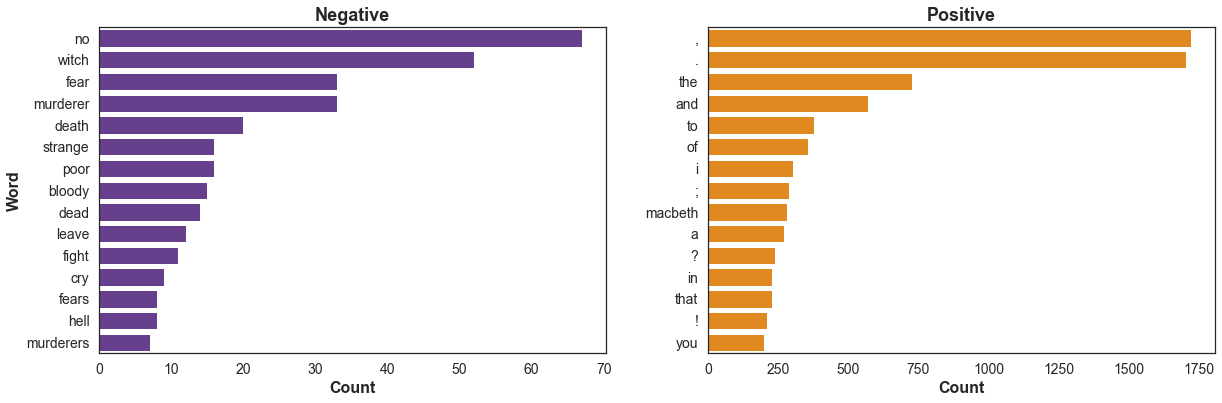

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", palette=None)

plt.subplots(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="count", y="word", data=negdf, color="rebeccapurple")
plt.xlabel('Count',fontsize=16, weight='bold');
plt.ylabel('Word', fontsize=16,weight='bold');
plt.title('Negative', fontsize=18,weight='bold')
plt.tick_params(axis='both',labelsize=14)

plt.subplot(1, 2, 2)
sns.barplot(x="count", y="word", data=posdf, color = "darkorange")
plt.xlabel('Count',fontsize=16, weight='bold');
plt.ylabel("")
plt.title('Positive', fontsize=18,weight='bold')
plt.tick_params(axis='both',labelsize=14)

plt.show()

#wondering how to get one x label/x label centered between two plots....

**The general counts are much higher for these plots than the ones above. There are a lot of punctuations in the Positive plot I generated, likely because it includes some neutral scores. There are similar words between the negative plots such as fear, murderer, bloody, dead, but none of the positive words overlap.**


The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

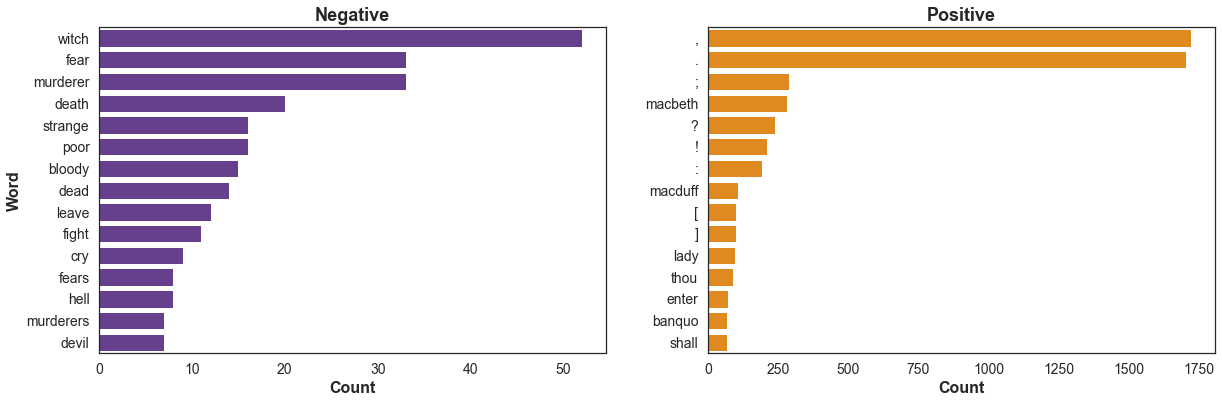

In [10]:
# Code:
wordsNoStopComp = [w for w in words if w not in myStopWords]

poswords_nostop = [] # words where score >= 0
negwords_nostop = [] # words where score < 0

for word in wordsNoStopComp:
    if sia.polarity_scores(word)['compound'] >= 0:
        poswords_nostop.append(word)
    elif sia.polarity_scores(word)['compound'] < 0:
        negwords_nostop.append(word)

common_pos_nostop = nltk.FreqDist(poswords_nostop).most_common(15)
common_neg_nostop = nltk.FreqDist(negwords_nostop).most_common(15)

posdf_nostop = pd.DataFrame(common_pos_nostop, columns = ["word", "count"])
negdf_nostop = pd.DataFrame(common_neg_nostop, columns = ["word", "count"])

plt.subplots(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="count", y="word", data=negdf_nostop, color="rebeccapurple")
plt.xlabel('Count',fontsize=16, weight='bold');
plt.ylabel('Word', fontsize=16,weight='bold');
plt.title('Negative', fontsize=18,weight='bold')
plt.tick_params(axis='both',labelsize=14)

plt.subplot(1, 2, 2)
sns.barplot(x="count", y="word", data=posdf_nostop, color = "darkorange")
plt.xlabel('Count',fontsize=16, weight='bold');
plt.ylabel("")
plt.title('Positive', fontsize=18,weight='bold')
plt.tick_params(axis='both',labelsize=14)

plt.show()

**'no' is no longer included in the the negative plot because it is a stopword. A few of the postive words we also eliminated, but still some punctuations remain.**

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

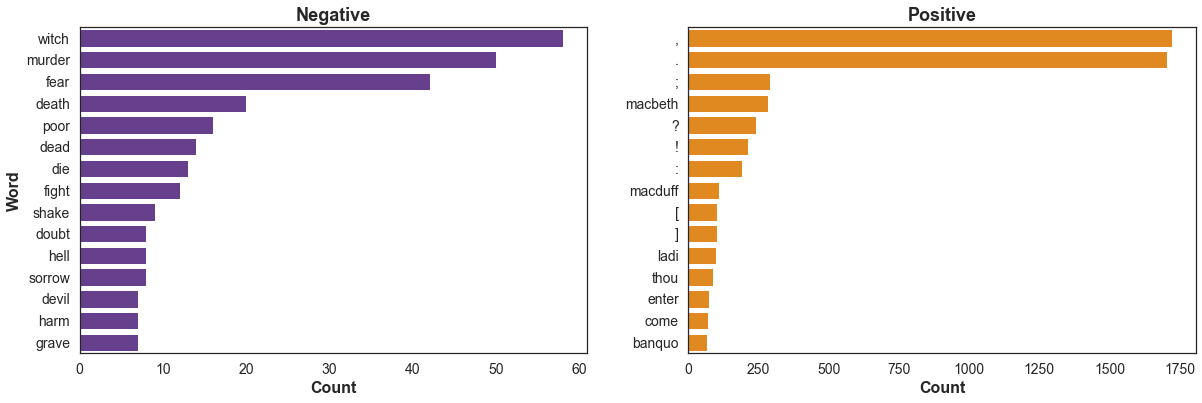

In [94]:
# Code:
wordPorterStems = [PorterStemmer().stem(w) for w in wordsNoStopComp]

poswords_nostop_stem = [] # words where score >= 0
negwords_nostop_stem = [] # words where score < 0

for word in wordPorterStems:
    if sia.polarity_scores(word)['compound'] >= 0:
        poswords_nostop_stem.append(word)
    elif sia.polarity_scores(word)['compound'] < 0:
        negwords_nostop_stem.append(word)

common_pos_nostop_stem = nltk.FreqDist(poswords_nostop_stem).most_common(15)
common_neg_nostop_stem = nltk.FreqDist(negwords_nostop_stem).most_common(15)

posdf_nostop_stem = pd.DataFrame(common_pos_nostop_stem, columns = ["word", "count"])
negdf_nostop_stem = pd.DataFrame(common_neg_nostop_stem, columns = ["word", "count"])

plt.subplots(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="count", y="word", data=negdf_nostop_stem, color="rebeccapurple")
plt.xlabel('Count',fontsize=16, weight='bold')
plt.ylabel('Word', fontsize=16,weight='bold')
plt.title('Negative', fontsize=18,weight='bold')
plt.tick_params(axis='both',labelsize=14)

plt.subplot(1, 2, 2)
sns.barplot(x="count", y="word", data=posdf_nostop_stem, color = "darkorange")
plt.xlabel('Count',fontsize=16, weight='bold')
plt.ylabel("")
plt.title('Positive', fontsize=18,weight='bold')
plt.tick_params(axis='both',labelsize=14)

plt.show()

**Fear and fears have been combined, as well as murder and murderers**

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):
![Sentiment Evolution in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-11-1.png)

We are going to make a couple different plots.

First:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by summing the compound scores of all the words in that scene
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

In [91]:
# function to get summed sentiment score
def sum_sentiment(scene):
    words = [w for w in word_tokenize(scene)]
    sentScore = 0.0
    for word in words:
        sentScore = sentScore + sia.polarity_scores(word)['compound']
    
    return sentScore

# loop through scenes and get summed sentiment score
scene_scores = []
for scene in r_j_scenes:
    scene_scores.append(sum_sentiment(scene))

# make a dataframe with scene name and score
scene_names = []
for i in range(len(r_j_scenes)):
    scene_names.append("Scene" + str(i+1))
    
zipped = list(zip(scene_names, scene_scores))
SceneScore_df = pd.DataFrame(zipped, columns=['Scene', 'Score'])


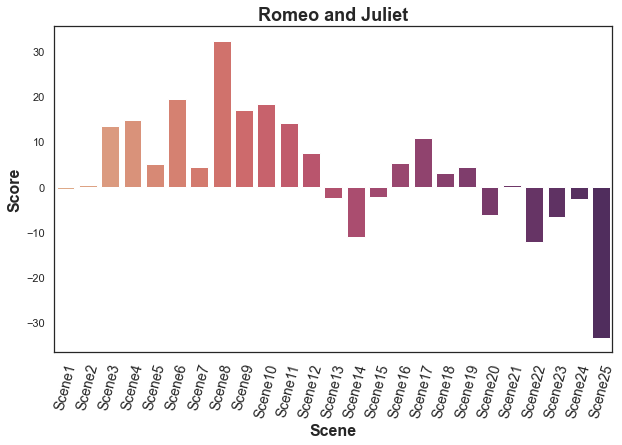

In [99]:
#bar plot
plt.subplots(figsize=(10, 6))
sns.barplot(x="Scene", y="Score", data = SceneScore_df, palette="flare")
plt.xlabel('Scene',fontsize=16, weight='bold')
plt.ylabel('Score', fontsize=16,weight='bold')
plt.title('Romeo and Juliet', fontsize=18,weight='bold')
plt.tick_params(axis='x',labelsize=14, labelrotation = 75)

plt.show()

**The general pattern is the same: higher positivity in the early scenes, with more negativity in the later scenes, however, the plot above picks up on some negativity in the earlier scenes that was not detected here.**

Second:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

In [100]:
# function to get summed sentiment score = difference between the positive and negative word counts
def sum_sentiment_posnegdiff(scene):
    words = [w for w in word_tokenize(scene)]
    sentScore = 0.0
    for word in words:
        if sia.polarity_scores(word)['compound'] > 0:
            sentScore = sentScore + 1 
        elif sia.polarity_scores(word)['compound'] < 0:
            sentScore = sentScore -1
    return sentScore

# loop through scenes and get summed sentiment score
scene_scores = []
for scene in r_j_scenes:
    scene_scores.append(sum_sentiment_posnegdiff(scene))

# make a dataframe with scene name and score
scene_names = []
for i in range(len(r_j_scenes)):
    scene_names.append("Scene" + str(i+1))
    
zipped = list(zip(scene_names, scene_scores))
SceneScore_df = pd.DataFrame(zipped, columns=['Scene', 'Score'])

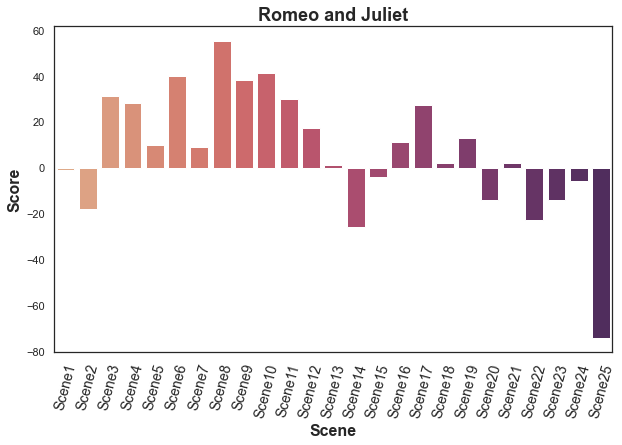

In [101]:
#bar plot
plt.subplots(figsize=(10, 6))
sns.barplot(x="Scene", y="Score", data = SceneScore_df, palette="flare")
plt.xlabel('Scene',fontsize=16, weight='bold')
plt.ylabel('Score', fontsize=16,weight='bold')
plt.title('Romeo and Juliet', fontsize=18,weight='bold')
plt.tick_params(axis='x',labelsize=14, labelrotation = 75)

plt.show()

**The plot changes slightly - now some negativity shows up in the earlier scenes and the negative sentiment increases in the final scenes**

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [103]:
nltk.download('opinion_lexicon')
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/courtney/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [104]:
testword = 'love'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

love is positive


Third plot:

* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

In [105]:
# function to get summed sentiment score = difference between the positive and negative word counts accordning to opinion lexicon
def sum_opinion_posnegdiff(scene):
    words = [w for w in word_tokenize(scene)]
    sentScore = 0.0
    for word in words:
        if word in positive_words:
            sentScore = sentScore + 1 
        elif word in negative_words:
            sentScore = sentScore -1
    return sentScore

# loop through scenes and get summed sentiment score
scene_scores = []
for scene in r_j_scenes:
    scene_scores.append(sum_opinion_posnegdiff(scene))

# make a dataframe with scene name and score
scene_names = []
for i in range(len(r_j_scenes)):
    scene_names.append("Scene" + str(i+1))
    
zipped = list(zip(scene_names, scene_scores))
SceneScore_df = pd.DataFrame(zipped, columns=['Scene', 'Score'])

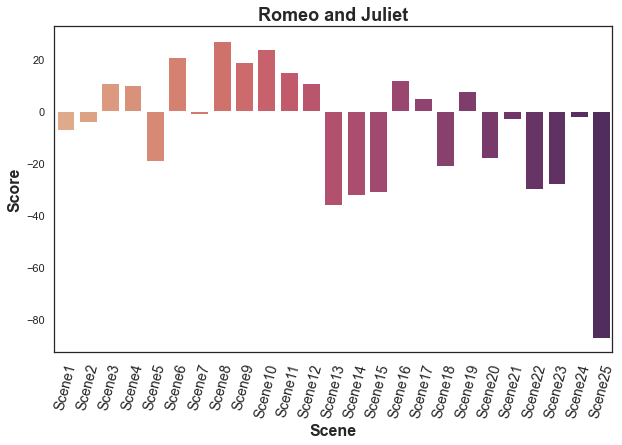

In [106]:
#bar plot
plt.subplots(figsize=(10, 6))
sns.barplot(x="Scene", y="Score", data = SceneScore_df, palette="flare")
plt.xlabel('Scene',fontsize=16, weight='bold')
plt.ylabel('Score', fontsize=16,weight='bold')
plt.title('Romeo and Juliet', fontsize=18,weight='bold')
plt.tick_params(axis='x',labelsize=14, labelrotation = 75)

plt.show()

**Yes, now even more negativity shows up in the earlier scenes and the contrast between positive and negative increases in the later scenes**

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

In [117]:
# Tokenize and group into batches
r_j_string_token = word_tokenize(r_j_string)b
batch_size = 500    
list_of_batches = [r_j_string_token[i:i+batch_size] for i in range(0, len(r_j_string_token), batch_size)]

# function to get summed sentiment score = difference between the positive and negative word counts accordning to opinion lexicon (but w/ batches)
def sum_sent_posnegdiff(batch):
    sentScore = 0.0
    for word in batch:
        if word in positive_words:
            sentScore = sentScore + 1 
        elif word in negative_words:
            sentScore = sentScore -1
    return sentScore

# loop through batches and get summed sentiment score
batch_scores = []
for batch in list_of_batches:
    batch_scores.append(sum_sent_posnegdiff(batch))

# make a dataframe with scene name and score
batch_names = []
for i in range(len(batch_scores)):
    batch_names.append("Batch" + str(i+1))
    
zipped = list(zip(batch_names, batch_scores))
SceneScore_df = pd.DataFrame(zipped, columns=['Batch', 'Score'])

In [122]:
#len(r_j_string_token)/500

64.876

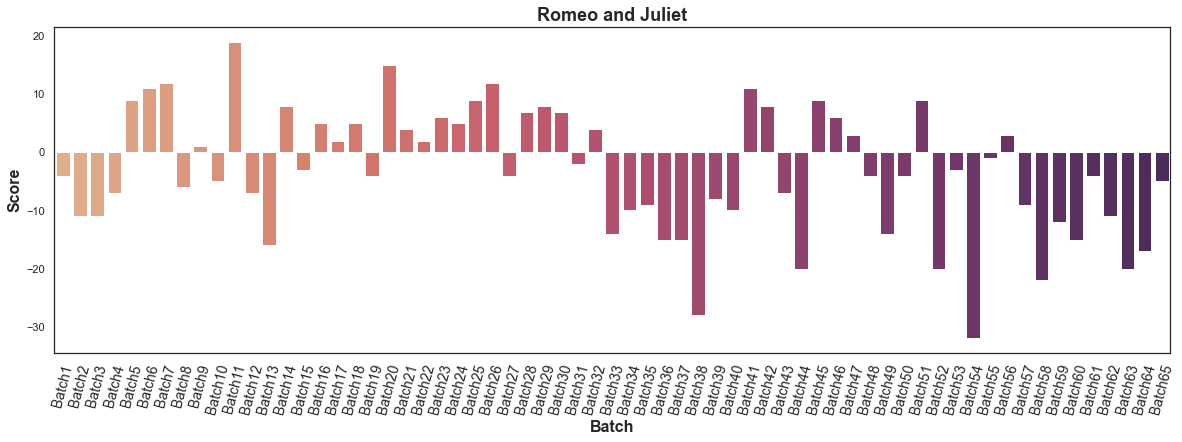

In [121]:
#bar plot
plt.subplots(figsize=(20, 6))
sns.barplot(x="Batch", y="Score", data = SceneScore_df, palette="flare")
plt.xlabel('Batch',fontsize=16, weight='bold')
plt.ylabel('Score', fontsize=16,weight='bold')
plt.title('Romeo and Juliet', fontsize=18,weight='bold')
plt.tick_params(axis='x',labelsize=14, labelrotation = 75)

plt.show()

**This plot still shows the overall pattern of progression from positive to negative, but with much more variablibity in the positive and negative sentiment throughout the play because we have spread out our sampling**

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

I would take a hydrid approach between breaking the play up by scenes and also dividing it into smaller segments since I would expect that Shakespearian academics may want to see the evolution of sentiment correspond to some aspect of play struction. I would calculate sentiment for each sentence within each act. I would use NLTK's Sentiwordnet since VADER is specifically attuned to sentiments expressed in social media, and that could have some discrepancies with such a historical text.